# Testing Codes for Preprocessing
* Reference: [OpenCV Word Segmenting on CAPTCHA Images](https://www.kaggle.com/fournierp/opencv-word-segmenting-on-captcha-images)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/term_project/dataset

/content/gdrive/My Drive/Colab Notebooks/term_project/dataset


In [ ]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/2pfpn.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/42xpy.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/2x7bm.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/3g2w6.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/3ndxd.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/2nbc5.jpg
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/3bfnd.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/4433m.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/37d52.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/2wx73.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/3xcgg.png
/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/36nx4.png
/content/gdrive/My Drive/Colab Notebooks

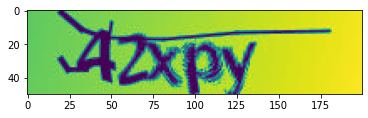

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/term_project/dataset/samples/samples/42xpy.png', 0)
plt.imshow(img)

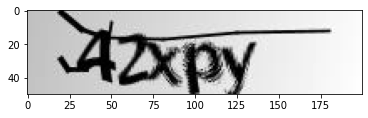

In [ ]:
plt.imshow(img, 'gray')

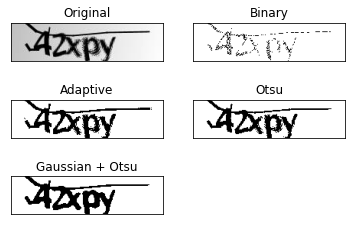

In [ ]:
# Make the image black/white (THRESH_BINARY)


# Thresholding
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)  # src, thresh, maxval, type  

# Adaptive thresholding
# ADAPTIVE_THRESH_MEAN_C: 주변 영역의 평균값을 이용
th_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)  

# Otsu thresholding
ret_otsu, th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Gaussian blur + Otsu threshoding
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # img, ksize, sigmaX
ret_otsu2, th_otsu2 = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



titles =['Original','Binary','Adaptive','Otsu','Gaussian + Otsu']
images = [img, th, th_adaptive, th_otsu, th_otsu2]

for i in range(5):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

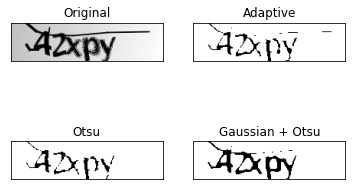

In [ ]:
# To remove the line on the image, apply dilation and erosion.
# Erotion: 각 Pixel에 structuring element를 적용하여 겹치는 부분이 하나라도 있으면 대상 pixel을 제거하는 방법. 작은 Object를 제거하는 효과.
# Dilation: Erosion과 반대로 대상을 확장한 후 작은 구멍을 채우는 방법. structuring element와 겹치는 부분이 하나라도 있으면 이미지를 확장.

# Dilation

kernel = np.ones((3,3), np.uint8)  # structuring element
dil_adaptive = cv2.dilate(th_adaptive, kernel, iterations=1)
dil_otsu = cv2.dilate(th_otsu, kernel, iterations=1)
dil_otsu2 = cv2.dilate(th_otsu2, kernel, iterations=1)

dil_titles = ['Original', 'Adaptive','Otsu','Gaussian + Otsu']
dil_images = [img, dil_adaptive, dil_otsu, dil_otsu2]


for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(dil_images[i],'gray')
    plt.title(dil_titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

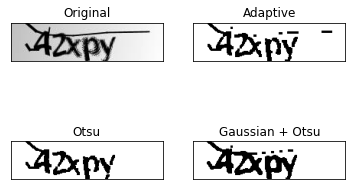

In [ ]:
# Dilation + Erosion

ero_adaptive = cv2.erode(dil_adaptive, kernel, iterations=1)
ero_otsu = cv2.erode(dil_otsu, kernel, iterations=1)
ero_otsu2 = cv2.erode(dil_otsu2, kernel, iterations=1)

ero_titles = ['Original', 'Adaptive','Otsu','Gaussian + Otsu']
ero_images = [img, ero_adaptive, ero_otsu, ero_otsu2]


for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(ero_images[i],'gray')
    plt.title(ero_titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

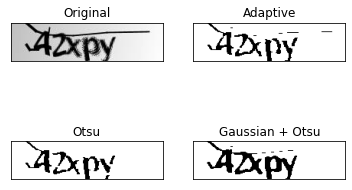

In [ ]:
# Dilation + Erosion + Dilation

kernel = np.ones((3, 1), np.uint8)
dil2_adaptive = cv2.dilate(ero_adaptive, kernel, iterations=1)
dil2_otsu = cv2.dilate(ero_otsu, kernel, iterations=1)
dil2_otsu2 = cv2.dilate(ero_otsu2, kernel, iterations=1)

dil2_titles = ['Original', 'Adaptive','Otsu','Gaussian + Otsu']
dil2_images = [img, dil2_adaptive, dil2_otsu, dil2_otsu2]


for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(dil2_images[i],'gray')
    plt.title(dil2_titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

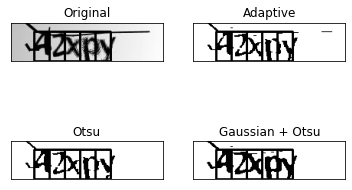

In [ ]:
# Separate each letter

x, y, w, h = 30, 12, 20, 38
for i in range(5):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dil2_adaptive, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dil2_otsu, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dil2_otsu2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

dil2_titles = ['Original', 'Adaptive','Otsu','Gaussian + Otsu']
dil2_images = [img, dil2_adaptive, dil2_otsu, dil2_otsu2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(dil2_images[i], 'gray')
    plt.title(dil2_titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

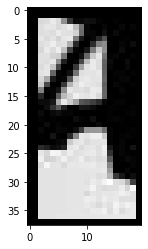

In [ ]:
x, y, w, h = 30, 12, 20, 38
cropped_img = img[y:y+h, x:x+w]

plt.imshow(cropped_img, 'gray')
